<a href="https://colab.research.google.com/github/Kussil/CVX_Rice_project/blob/main/Vector_Query/Query_Vector_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Dependenies
!pip install -q -U langchain transformers bitsandbytes accelerate
!pip install -q sentence-transformers
!pip install -q pinecone
!pip install -q langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.7/973.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 844.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
# Import github token with google secrets thingy and clone git repository
import os
from google.colab import userdata
GITHUB_TOKEN = userdata.get('github')
os.environ['GITHUB_TOKEN'] = GITHUB_TOKEN
!git clone https://{GITHUB_TOKEN}@github.com/Kussil/CVX_Rice_project.git

fatal: destination path 'CVX_Rice_project' already exists and is not an empty directory.


In [ ]:
import pandas as pd
df = pd.read_csv('CVX_Rice_project/chunkdata.csv')

def convert_string(string):
  return string[2:-2].split("', ")

df['Text Chunks']=df['Text Chunks'].apply(convert_string)
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df

,Unnamed: 0,Title,Date,URL,Text Chunks,Chunk Sentiments
0,0,Us Oil Shares Climb As Renewables Sector Slides,2020-11-05,https://www.proquest.com/newspapers/us-oil-sha...,[[CLS] turn on search term navigationturn on s...,"[[0.009907299652695656, 0.969087541103363, 0.0..."
1,1,Us Oil Shares Climb As Renewables Sector Slides,2020-11-05,https://www.proquest.com/newspapers/us-oil-sha...,[[CLS] turn on search term navigationturn on s...,"[[0.009907299652695656, 0.969087541103363, 0.0..."
2,2,Switching Natural Gas Evidence Philippine,2020-11-05,https://www.proquest.com/newspapers/switching-...,"[[CLS] last week, we discussed the situations ...","[[0.08650864660739899, 0.027432089671492577, 0..."
3,3,Frances Engie Backs Out U S Lng Deal Power,2020-11-03,https://www.proquest.com/newspapers/frances-en...,[[CLS] french power company engie sa has halte...,"[[0.04596712067723274, 0.7701719403266907, 0.1..."
4,4,United States President Donald J Trump Is,2020-11-03,https://www.proquest.com/newspapers/united-sta...,[[CLS] safeguarding american jobs : president ...,"[[0.10893604159355164, 0.19322237372398376, 0...."
...,...,...,...,...,...,...
3495,3495,Argus Research Company: MPC: A6 Report for 01/...,2021-01-06,NaN,"[[CLS] stock report | january 29, 2021 | nyse ...","[[0.0927271619439125, 0.013756022788584232, 0...."
3496,3496,CFRA Equity Research: Hess Corporation,2021-01-02,NaN,[[CLS] paris maligned ii climate alignment ass...,"[[0.030151909217238426, 0.15346725285053253, 0..."
3497,3497,CFRA Equity Research: Exxon Mobil Corporation,2021-01-02,NaN,"[[CLS] stock report | november 05, 2022 | nyse...","[[0.8873805403709412, 0.010333924554288387, 0...."
3498,3498,CFRA Equity Research: BP p.l.c.,2021-01-02,NaN,"[[CLS] stock report | may 20, 2023 | nyse symb...","[[0.8939493298530579, 0.010100755840539932, 0...."


### Pull Models

In [ ]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key="bc4ea65c-d63e-48e4-9b65-53d6272d927d")

from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-mpnet-base-v2")

# Import Libraries
import torch
from transformers import BitsAndBytesConfig
from langchain import HuggingFacePipeline
from langchain import PromptTemplate, LLMChain
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

# Define Quantization
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True)

# Load Model and Tokenizer
from google.colab import userdata
HF_TOKEN = userdata.get('hf')
os.environ['HF_TOKEN'] = HF_TOKEN
model_4bit = AutoModelForCausalLM.from_pretrained( "meta-llama/Meta-Llama-3-8B-Instruct",
                                                  device_map="auto",
                                                   quantization_config=quantization_config,
                                                   token={HF_TOKEN})
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B-Instruct", token={HF_TOKEN})

# Create Hugging Face Pipeline
pipeline_inst = pipeline(
        "text-generation",
        model=model_4bit,
        tokenizer=tokenizer,
        use_cache=True,
        device_map="auto",
        max_length=6000,
        do_sample=True,
        top_k=1,
        num_return_sequences=1,
        eos_token_id=tokenizer.eos_token_id,
        pad_token_id=tokenizer.eos_token_id)

llm = HuggingFacePipeline(pipeline=pipeline_inst)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
#run similarity search


def ask_vector_query(query, top_results, date=None, pinecone_index):

  query_embeddings = embedding_model.encode(query)

  if date==None:
    filter = {}
  else:
    filter={
        "date": {"$eq": date}
      }

  index_name = pinecone_index#"newsembedding"

  index = pc.Index(index_name)

  output = index.query(
      namespace="ns1",
      vector=[float(i) for i in list(query_embeddings)],
      filter=filter,
      top_k=3,
      include_values=False,
      include_metadata=True
  )
  print(output['matches'])

  retrieved_text = ' '
  for i in range(len(output['matches'])):
    title, chunk = output['matches'][i]['metadata']['title'].rsplit(':',1)
    date = output['matches'][i]['metadata']['date']
    #print(title, chunk, date)
    chunk_text = df['Text Chunks'][(df['Date'] == date) & (df['Title'] == title)].iloc[0][int(chunk)]
    #print(chunk_text)
    retrieved_text += ' ' + chunk_text

  #print(retrieved_text)

  # Prompt and response function
  template = """<s>Given the text from a financial news article, analyze the content and produce an answer to the provided query:

          **Constraints:** ONLY RESPOND USING THE PROVIDED Context/n/n

          The context from the financial news article excerpts below:
          {article}

          Query:
          {query}
          </s>
          """

  with torch.no_grad():
    prompt = PromptTemplate(template=template, input_variables=["article","query"])
    llm_chain = LLMChain(prompt=prompt, llm=llm)
    full_response = llm_chain.run({"article":retrieved_text, "query":query})

  split_response = full_response.split("</s>", 1)
  final_response = split_response[1]
  return final_response

In [ ]:
# Test Function
import textwrap

query = "what is company is chevron trying to buy?"
top_results = 3

print(textwrap.fill(ask_vector_query(query, top_results, date=None, "newsembedding"), width=80))

[{'id': '3786',
 'metadata': {'date': 'Jun 19, 2020',
              'neg': 0.9147204756736755,
              'neu': 0.0749044194817543,
              'pos': 0.010375114157795906,
              'title': 'Chevron Seeks Exit 34B Nw Shelf Asset:2'},
 'score': 0.671933591,
 'values': []}, {'id': '21977',
 'metadata': {'date': 'Mar 20, 2024',
              'neg': 0.12481819838285446,
              'neu': 0.8611306548118591,
              'pos': 0.014051218517124653,
              'title': 'United States M Amp Activity 2023 Furthers:0'},
 'score': 0.647896051,
 'values': []}, {'id': '35095',
 'metadata': {'date': '6/3/23',
              'neg': 0.9352022409439087,
              'neu': 0.053625572472810745,
              'pos': 0.011172226630151272,
              'title': 'CFRA Equity Research: Shell plc:0'},
 'score': 0.619376123,
 'values': []}]
             **Answer:** Based on the provided context, Chevron is trying to buy
Hess Corporation, specifically the stake in the Stabroek block off t

# Query from Interactive Plot

In [ ]:
!pip install -q ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.5 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import yfinance as yf
ticker = 'CVX'
price = yf.download(ticker, start="2024-04-01")["Adj Close"]
ret = price.pct_change().dropna()
ret.name = "ret"
ret.describe()

[*********************100%%**********************]  1 of 1 completed


count    34.000000
mean      0.000996
std       0.009499
min      -0.030421
25%      -0.003314
50%       0.002466
75%       0.005724
max       0.017903
Name: ret, dtype: float64

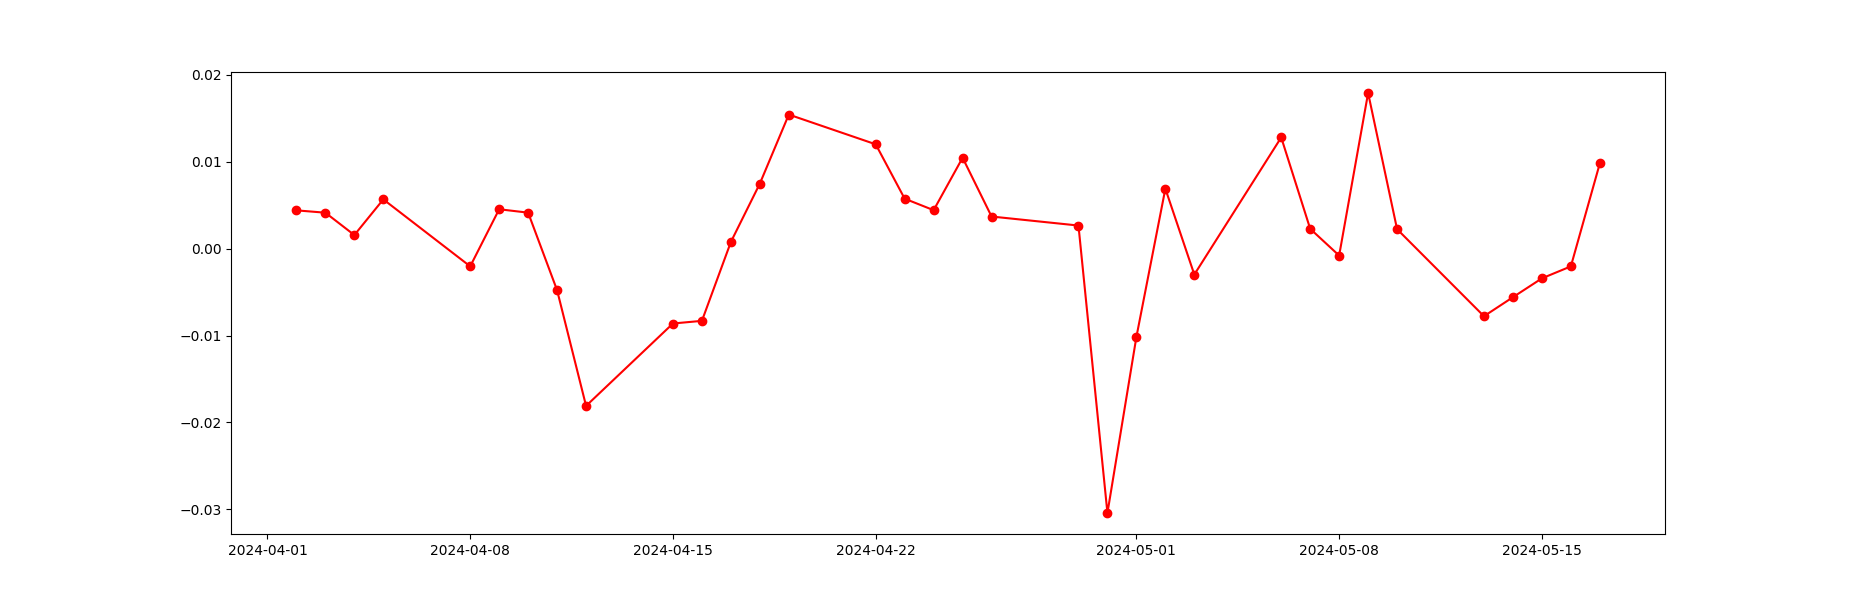

2024-04-12
[]
                       <s>Given the text from a financial news article, analyze
the content and produce an answer to the provided query:
**Constraints:** ONLY RESPOND USING THE PROVIDED Context/n/n            The
context from the financial news article excerpts below:
Chevron's quarterly earnings report highlights the company's resilience in the
face of global economic uncertainty. The report shows that Chevron's revenue has
increased by 15% compared to the same period last year, with net income rising
by 12%. The company's CEO, Michael Wirth, attributed the success to the
company's diversified portfolio and its ability to adapt to changing market
conditions.            Chevron's quarterly earnings report also highlights the
company's efforts to reduce its carbon footprint. The company has set a goal to
reduce its greenhouse gas emissions by 50% by 2030, and has made significant
progress towards achieving this target. The report notes that Chevron has
reduced its emission

In [ ]:
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 6, forward=True)

tolerance = 2 # points
ax.plot(ret.index, ret, 'ro-', picker=tolerance)

def onclick(event):
    line = event.artist
    xdata, ydata = line.get_data()
    ind = event.ind
    datetime_obj  = xdata[ind][0].astype('datetime64[s]').astype(datetime)
    formatted_date = datetime_obj.strftime('%Y-%m-%d')
    print(formatted_date)
    query = 'summarize the top news articles for chevron?'
    print(textwrap.fill(ask_vector_query(query, top_results, date=None, "newsembedding2"), width=80))

#cid = fig.canvas.mpl_connect('button_press_event', onclick)
cid = fig.canvas.mpl_connect('pick_event', onclick)

In [ ]:
df

,Unnamed: 0,Title,Date,URL,Text Chunks,Chunk Sentiments
0,0,Us Oil Shares Climb As Renewables Sector Slides,"Nov 5, 2020",https://www.proquest.com/newspapers/us-oil-sha...,[[CLS] turn on search term navigationturn on s...,"[[0.009907299652695656, 0.969087541103363, 0.0..."
1,1,Us Oil Shares Climb As Renewables Sector Slides,"Nov 5, 2020",https://www.proquest.com/newspapers/us-oil-sha...,[[CLS] turn on search term navigationturn on s...,"[[0.009907299652695656, 0.969087541103363, 0.0..."
2,2,Switching Natural Gas Evidence Philippine,"Nov 5, 2020",https://www.proquest.com/newspapers/switching-...,"[[CLS] last week, we discussed the situations ...","[[0.08650864660739899, 0.027432089671492577, 0..."
3,3,Frances Engie Backs Out U S Lng Deal Power,"Nov 3, 2020",https://www.proquest.com/newspapers/frances-en...,[[CLS] french power company engie sa has halte...,"[[0.04596712067723274, 0.7701719403266907, 0.1..."
4,4,United States President Donald J Trump Is,"Nov 3, 2020",https://www.proquest.com/newspapers/united-sta...,[[CLS] safeguarding american jobs : president ...,"[[0.10893604159355164, 0.19322237372398376, 0...."
...,...,...,...,...,...,...
3495,3495,Argus Research Company: MPC: A6 Report for 01/...,1/6/21,NaN,"[[CLS] stock report | january 29, 2021 | nyse ...","[[0.0927271619439125, 0.013756022788584232, 0...."
3496,3496,CFRA Equity Research: Hess Corporation,1/2/21,NaN,[[CLS] paris maligned ii climate alignment ass...,"[[0.030151909217238426, 0.15346725285053253, 0..."
3497,3497,CFRA Equity Research: Exxon Mobil Corporation,1/2/21,NaN,"[[CLS] stock report | november 05, 2022 | nyse...","[[0.8873805403709412, 0.010333924554288387, 0...."
3498,3498,CFRA Equity Research: BP p.l.c.,1/2/21,NaN,"[[CLS] stock report | may 20, 2023 | nyse symb...","[[0.8939493298530579, 0.010100755840539932, 0...."
